# TP N°2: Neurona Integrate and Fire

Realizá un programa usando algún método de integración numérica de ecuaciones diferenciales ordinarias (ODS) como por ejemplo Euler o Runge Kutta de cuarto orden, que te permita resolver el problema de una neurona integrate-and-fire.

Con dicho programa integrá el problema de valor inicial con $V (0) = V_{reposo} = −65\ mV$ entre $t_0 = 0$ y $t_f = 200\ s$ con un paso de integración $∆t = 0.1\ s$. Los parámetros deben ser $V_{reposo} = −65\ mV$, $V_u = −50\ mV$ (potencial de umbral), $\tau_m = 10\ ms$ y $R_m = 10\ M\Omega$. La corriente externa debe ser constante y tomar el valor $I_e = 2\ nA$

Deberás presentar el gráfico $V (t)$ vs. $t$.

Luego variá los valores de la corriente externa, manteniéndola siempre constante, y analizá cómo cambia el tren de espigas.

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import time
#https://mat.caminos.upm.es/wiki/Modelo_Depredador-Presa_de_Lotka-Volterra_(grupo_16)

class IF_Neuron:
    
    def __init__(self, Vrest, Vth, tau, R, i):
        self.Vrest = Vrest/1000
        self.Vth = Vth/1000
        self.tau = tau/1000
        self.R = R
        self.current = i
    
    def V(self, V):
        return (self.Vrest - V + self.R * self.I())/self.tau      
    
    def I(self):
        return self.current
    
    def coefsK(self, y, h):
        # Calcula los coeficientes
        k1 = self.V(y)
        k2 = self.V(y+.5*k1*h)
        k3 = self.V(y+.5*k2*h)
        k4 = self.V(y+k3*h)
        return k1, k2, k3, k4    
    
    def solve(self, y0, h, t_start, t_end):
        t = t_start
        V = [y0/1000]
        i = 0
        graph = []
        while(t <= t_end):
        #while(i<2000):
            if(V[i] > self.Vth):
                temp_y0 = self.Vrest
            else:
                k1, k2, k3, k4 = self.coefsK(V[i], h)
                temp_y0 = V[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
            
            ## update values
            V.append(temp_y0)

            t += h
            i += 1
            graph.append([t*1000, temp_y0*1000])
          
        return graph

    def getI(self):
        return self.current
    
    def setI(self, i):
        self.current = i
 
    def getR(self):
        return self.R

    def setR(self, R):
        self.R = R

    def get_tau(self):
        return self.tau

    def set_tau(self, tau):
        self.tau = tau        

    def getVrest(self):
        return self.Vrest

    def setVrest(self, Vrest):
        self.Vrest = Vrest 

    def getVth(self):
        return self.Vth

    def setVth(self, Vth):
        self.Vth = Vth         
        


### Corriente $I = 2\ nA$

In [275]:
if_neuron = IF_Neuron(-65, -50, 10, 10e6, 2e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 2 nA')

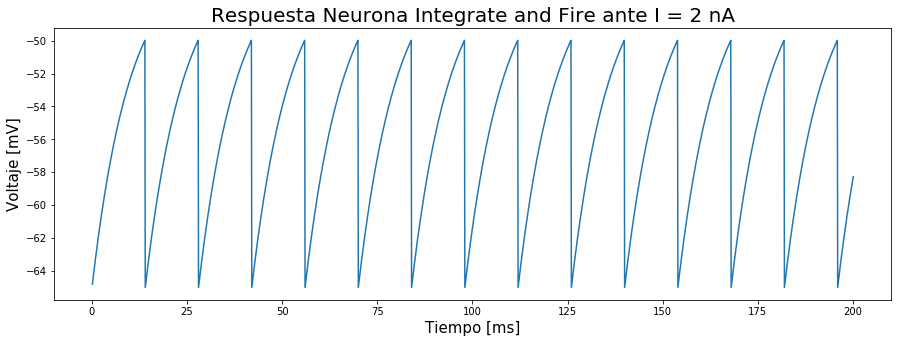

In [276]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 2 nA", fontsize = 20)



### Corriente $I = 5\ nA$

In [277]:
if_neuron.setI(5e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 5 nA')

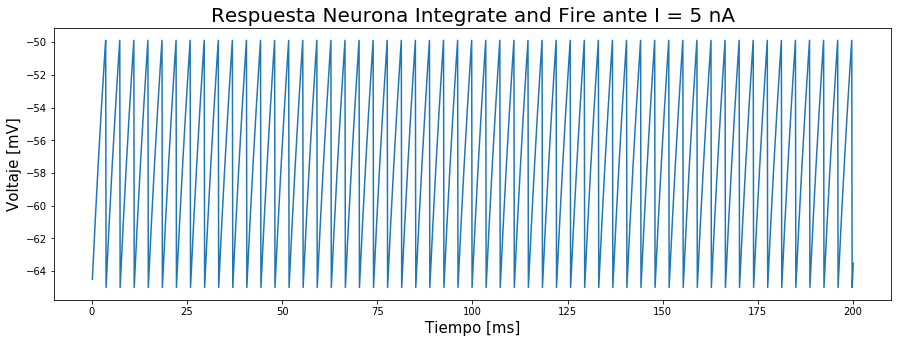

In [278]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 5 nA", fontsize = 20)



### Corriente $I = 10\ nA$

In [279]:
if_neuron.setI(10e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 10 nA')

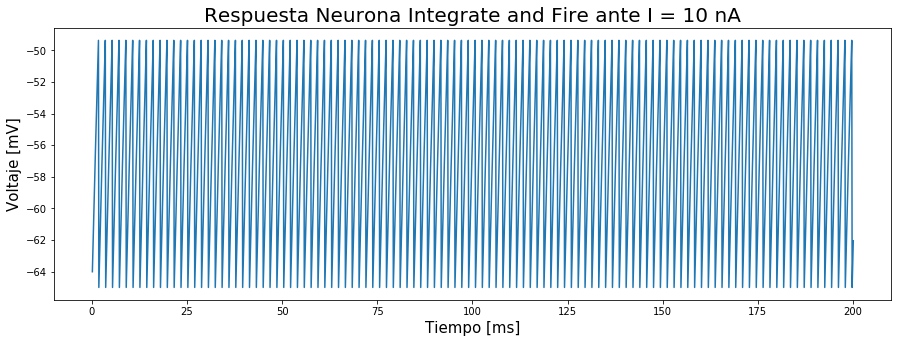

In [280]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 10 nA", fontsize = 20)



### Corriente $I = 1.6\ nA$

In [289]:
if_neuron.setI(1.6e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 1.6 nA')

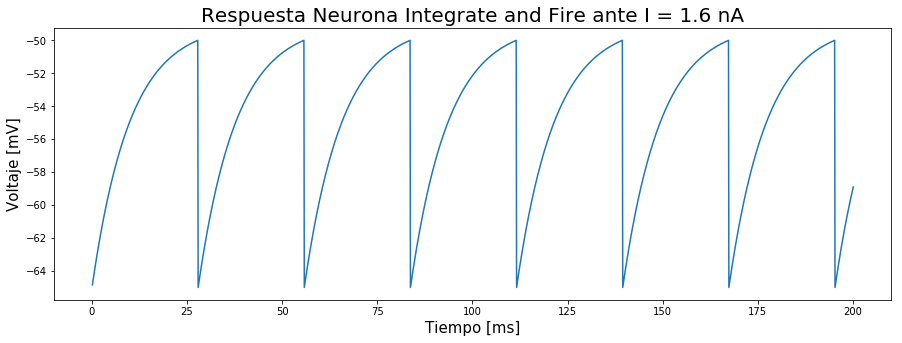

In [290]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 1.6 nA", fontsize = 20)



### Corriente $I = 1.55\ nA$

In [305]:
if_neuron.setI(1.55e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 1.55 nA')

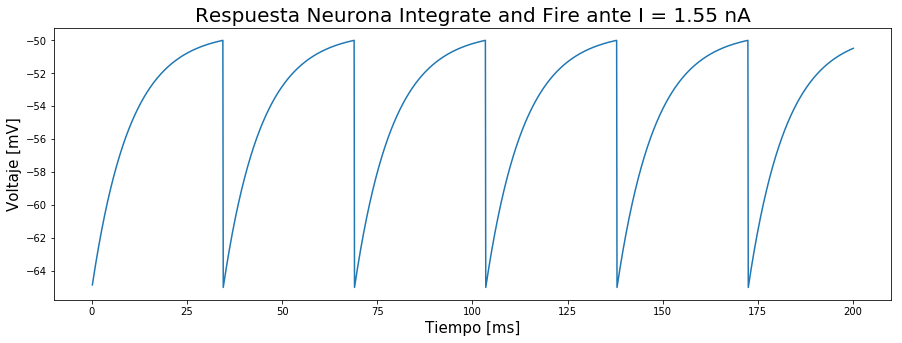

In [306]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 1.55 nA", fontsize = 20)



### Corriente $I = 1.4\ nA$

In [335]:
if_neuron.setI(1e-9)
volt = if_neuron.solve(y0=-65, h=0.1e-3, t_start=0, t_end=200e-3)


Text(0.5,1,'Respuesta Neurona Integrate and Fire ante I = 1 nA')

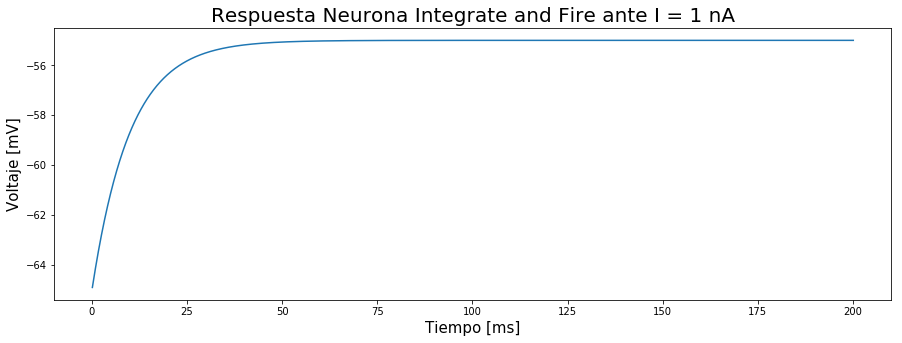

In [336]:
volt = np.array(volt)
f = plt.figure(figsize=(15, 5))
plt.plot(volt[:,0], volt[:,1])
plt.xlabel("Tiempo [ms]", fontsize = 15)
plt.ylabel("Voltaje [mV]", fontsize = 15)
plt.title("Respuesta Neurona Integrate and Fire ante I = 1 nA", fontsize = 20)



## Conclusiones

Al ser estimulada con corrientes superiores a 2 nA, la neurona supera el potencial de reposo en un tiempo menor, lo que se traduce en un disparo más rápido. En consecuencia, se observa como respuesta un tren de espigas de mayor frecuencia con respecto al observado para 2 nA.

Por el contrario, cuando la neurona es estimulada con corrientes inferiores, se observa que la neurona demora más en alcanzar el potencial umbral, por lo que la espiga se hace más ancha y los disparos consecuentes presentan una frecuencia menor. Para corrientes muy bajas, incluso se observa que la neurona no supera nunca el umbral; sino que alcanza un potencial de menor valor a éste y se mantiene constante en él. Esto se debe a que la corriente inyectada no es lo suficientemente intensa como para provocar un potencial de acción. 

In [ ]:
C:/Users/aleja/Documents/Python Scripts/Curso Redes Neuronales